# Week 6 -  13th Sep, 2023

## 6.1
Use the csv/xls file assigned to you, and Report correlation of all input features with the output variable (Y). If features are more than one, report the features correlated at a cutoff of 0.6.

In [2]:
import pandas as pd

input_df = pd.read_csv('../pca-datasets/cust2.csv')
input_df.head(5)

,Cust_no,Ec-products,Stationary,fashion_prod,other_shopping,Savings
0,1,0.9,3.010,9.10,11.1,-2.00
1,2,5.5,7.023,0.23,9.5,-9.27
2,3,3.3,3.822,1.92,0.0,1.92
3,4,0.2,3.310,18.20,12.7,5.50
4,5,1.5,2.112,0.10,6.5,-8.38


In [3]:
filtered_df = input_df.drop(['Cust_no'], axis=1)

In [4]:
correlation_df = filtered_df.corr()
correlation_df

,Ec-products,Stationary,fashion_prod,other_shopping,Savings
Ec-products,1.000000,0.820644,-0.479381,0.227550,-0.546897
Stationary,0.820644,1.000000,0.029120,0.542267,-0.328027
fashion_prod,-0.479381,0.029120,1.000000,0.032551,0.762771
other_shopping,0.227550,0.542267,0.032551,1.000000,-0.599765
Savings,-0.546897,-0.328027,0.762771,-0.599765,1.000000


Given the cutoff of 0.6, we see that only `fashion_prod` crosses 0.6.

## 6.2

Now Use the feature with the highest correlation as X, and build the Simple Linear regression (SLR) model for X vs Y. Display it’s coefficients, R-square value, and check its significance for alpha=0.1

In [5]:
X = input_df.fashion_prod
Y = input_df.Savings

To estimate the regression coefficient β₀, a constant term of 1 needs to be added as a separate column. As the value of the columns remains same across all samples, the parameter estimated for this feature or column will be the intercept term.

In [6]:
import statsmodels.api as sm
X = sm.add_constant(X)
X.head(5)

,const,fashion_prod
0,1.0,9.10
1,1.0,0.23
2,1.0,1.92
3,1.0,18.20
4,1.0,0.10


Now, we split the dataset into training and testing datasets.

In [7]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=100)

`train_size` of 0.8 implies that 80% of the data is used for training the model and the remaining 20% is used for validating the model.

### Fitting the model
We will fit the model using OLS method and pass `train_Y` and `train_X` as parameters.

In [8]:
savings_slr = sm.OLS(train_Y, train_X).fit()
savings_slr.params

const          -8.720007
fashion_prod    1.057888
dtype: float64

In [9]:
savings_slr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.563   
Dependent Variable: Savings          AIC:                185.2187
Date:               2023-09-20 11:07 BIC:                187.8831
No. Observations:   28               Log-Likelihood:     -90.609 
Df Model:           1                F-statistic:        35.74   
Df Residuals:       26               Prob (F-statistic): 2.60e-06
R-squared:          0.579            Scale:              40.786  
-----------------------------------------------------------------
                  Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
-----------------------------------------------------------------
const            -8.7200   1.8283 -4.7695 0.0001 -12.4781 -4.9619
fashion_prod      1.0579   0.1769  5.9787 0.0000   0.6942  1.4216
-----------------------------------------------------------------
Omnibus:              13.766       Durbin-Watson:          2.509 
Prob(Omnibus):        0.001        Jarque-Bera (JB):       14.348
Skew:                 -1.294       Prob(JB):               0.001 
Kurtosis:             5.366        Condition No.:          16    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

We obsserve that the R-square value is `0.579` which implies that the model explains 57.9% of variance. The P-value for `fashion_prod` is `0.0000`, hence the significance crosses the alpha threshold.

## 6.3

Predict the output over the test data and compute the results’ R-square and MSE

In [10]:
pred_Y = savings_slr.predict(test_X)
pred_Y

33   -3.536356
34   -0.680059
31   -8.085274
5    -2.055313
1    -8.476692
13   -6.022393
18   -6.604231
dtype: float64

In [11]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

r2 = np.abs(r2_score(test_Y, pred_Y))
mse = mean_squared_error(test_Y, pred_Y)

print(f"R-square value: {round(r2, 4)}")
print(f"MSE: {round(mse, 4)}")

R-square value: 0.4128
MSE: 12.8089


## 6.4

Find its outliers. Analyze whether outlier(s) detected by z-score, Cook and Leverage method are same or not? If no outliers are present in your data, modify the datafile and do the analysis.

### Finding outliers using the Z-score method

In [12]:
from scipy.stats import zscore

savings_df = filtered_df
savings_df['savings_z_score'] = zscore(input_df.Savings)
savings_df[(savings_df.savings_z_score > 3.0) | (savings_df.savings_z_score < -3.0)]

,Ec-products,Stationary,fashion_prod,other_shopping,Savings,savings_z_score
21,4.4,5.85,0.4,19.6,-29.1,-3.143628


As seen above, we observe one outlier using the z-score method

### Finding outliers using Cook's distance

Text(0, 0.5, "Cook's distance")

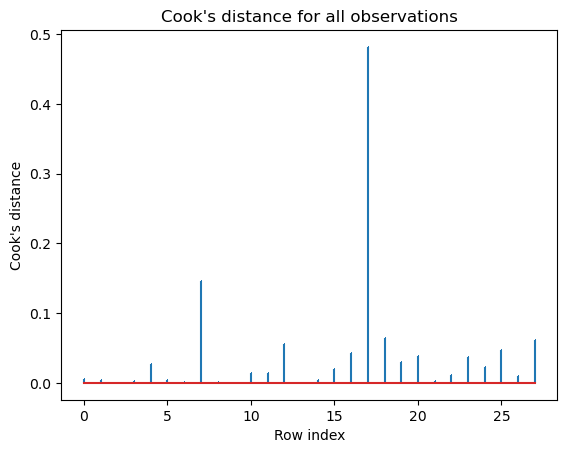

In [14]:
savings_slr = sm.OLS(train_Y, train_X).fit()
savings_influence = savings_slr.get_influence()
cooks_distances, p_values = savings_influence.cooks_distance

import matplotlib.pyplot as plt

plt.stem(np.arange(len(train_X)), cooks_distances, markerfmt=',')
plt.title("Cook's distance for all observations")
plt.xlabel('Row index')
plt.ylabel("Cook's distance")

Text(0, 0.5, "Cook's distance")

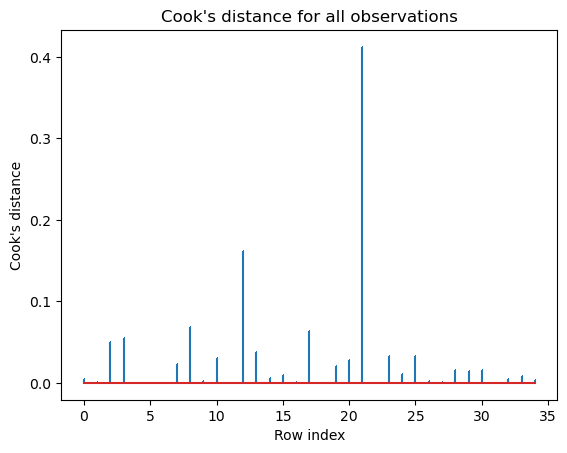

In [15]:
test_slr = sm.OLS(Y, X).fit()
savings_influence = test_slr.get_influence()
cooks_distances, p_values = savings_influence.cooks_distance

import matplotlib.pyplot as plt

plt.stem(np.arange(len(X)), cooks_distances, markerfmt=',')
plt.title("Cook's distance for all observations")
plt.xlabel('Row index')
plt.ylabel("Cook's distance")

As seen above, we do NOT observe any outliers through this method. We need to change the threshold to better view the outlier(s).

### Finding outliers using Leverage method

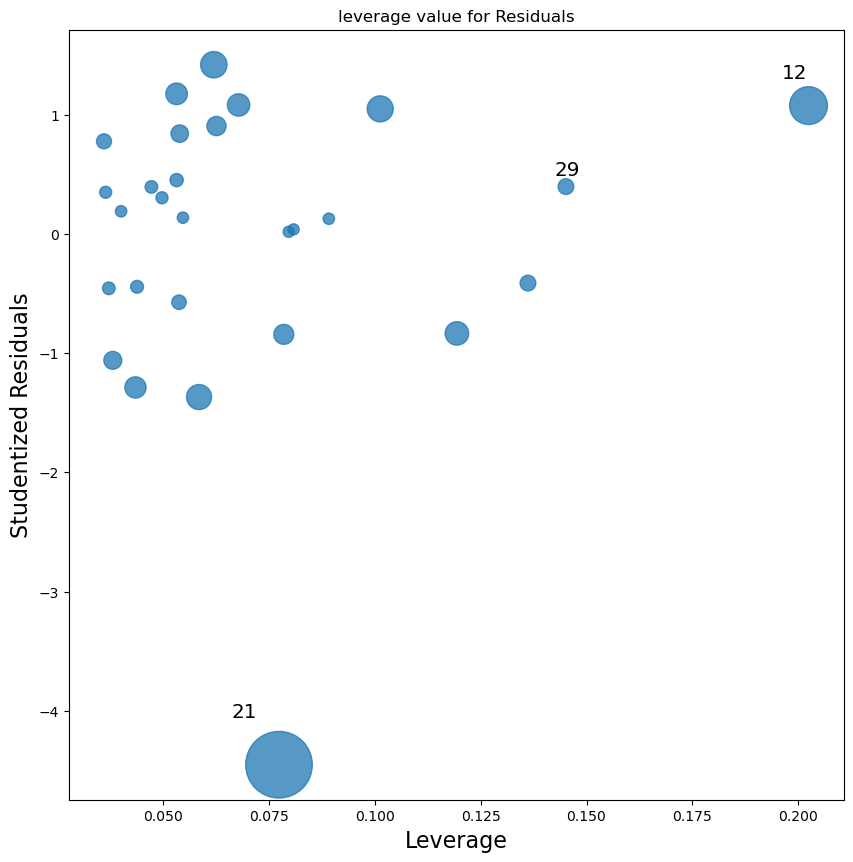

In [16]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots(figsize=(10,10))
influence_plot(savings_slr, ax = ax)
plt.title("leverage value for Residuals")
plt.show()

As seen above, we observe one outlier using the leverage method; which is the same as we saw using the z-score method.